# Q.3

##  Multivariate Guassian Distribution

## Part 3a

## To study how covariance matrix changes the contours and to generate plots similar to figure 2.23 of Bishop book.

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from random import random
from math import log, cos, sin, sqrt, pi

### Defining Gaussian class for any particular mean and covariance matrix.

In [ ]:
''' A guassian class which has mean, variance, dimension of variable and fractional contribution to mixture of guassians as member variables
 and has member functions to calculate pmf of x and to generate countour corresponding to mean and variance
'''
class Gaussian :
    def __init__(self, Mu, Sigma, D, lamda_fraction = 1):
        self.Mu = Mu
        self.Sigma = Sigma
        self.D = D
        self.lamda_fraction = lamda_fraction
        self.const_multiplier = lamda_fraction * 1 / (((2 * np.pi) ** (self.D / 2)) * (abs(np.linalg.det(self.Sigma)) ** (1 / 2)))
        
        
    def pmf(self, X):
        #to calculate pmf of occurence of x
        assert X.shape[0] == self.D
        exponent = -0.5 * np.dot(np.dot((self.Mu - X), np.linalg.inv(self.Sigma)), (self.Mu - X).T)
        return self.const_multiplier * np.exp(exponent)

    def generateCountour (self, sample_size = 100):
        # function to provide grid data to generate contour
        # create array of points from mean - 3*Sigma to mean + 3*Sigma
        x1 = np.linspace(self.Mu[0] - 3 * self.Sigma[0][0], self.Mu[0] + 3 * self.Sigma[0][0], sample_size)
        x2 = np.linspace(self.Mu[1] - 3 * self.Sigma[1][1], self.Mu[1] + 3 * self.Sigma[1][1], sample_size)
        X1, X2 = np.meshgrid(x1, x2)
      
        Z = np.zeros((sample_size, sample_size))
        for i in range(sample_size):
            for j in range(sample_size):
                X = np.array([X1[i][j], X2[i][j]])
                Z[i][j] = self.pmf(X)
        return X1, X2, Z

### Generating sample contours with respect to various covariance matrices to observe change in contour with change in covariance matrix.

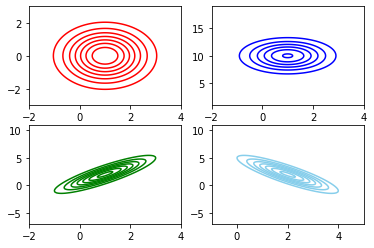

In [ ]:
gaussian1 = Gaussian(np.array([1, 0]), np.array([[1, 0], [0, 1]]), 2)
X11, X12,  Z1 = gaussian1.generateCountour() 
plt.subplot(2,2,1)
plt.contour(X11, X12, Z1, colors='r')

gaussian2 = Gaussian(np.array([1, 10]), np.array([[1, 0], [0, 3]]), 2)
X21, X22,  Z2 = gaussian2.generateCountour() 
plt.subplot(2,2,2)
plt.contour(X21, X22, Z2, colors='b')

gaussian3 = Gaussian(np.array([1, 2]), np.array([[1, 1.5], [1.5, 3]]), 2)
X31, X32,  Z3 = gaussian3.generateCountour() 
plt.subplot(2,2,3)
plt.contour(X31, X32, Z3, colors='g')

gaussian4 = Gaussian(np.array([2, 2]), np.array([[1, -1.5], [-1.5, 3]]), 2)
X41, X42,  Z4 = gaussian4.generateCountour() 
plt.subplot(2,2,4)
plt.contour(X41, X42, Z4, colors='skyblue')

plt.show()

### Based on above observed contours, trying to generate contours similar to that of figure 2.23 of Bishop book.

Text(8, 2.5, '0.2')

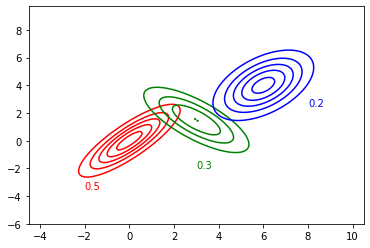

In [ ]:
# lets generate 3 gaussians with nearby means and different covariance matrices
lamdas = [0.5, 0.3, 0.2]
gaussian1 = Gaussian(np.array([0, 0]), np.array([[1.5, 1.4], [1.5, 2]]), 2, lamdas[0])
gaussian2 = Gaussian(np.array([3, 1.5]), np.array([[2, -1.5], [-1.5, 2]]), 2, lamdas[0])
gaussian3 = Gaussian(np.array([6, 4]), np.array([[1.5, 0.8], [0.9, 1.9]]), 2, lamdas[0])
X11, X12, Z1 = gaussian1.generateCountour()
X21, X22, Z2 = gaussian2.generateCountour()
X31, X32, Z3 = gaussian3.generateCountour()

#plotting contours of individual guassians before mixing
plt.contour(X11, X12, Z1, colors='r', levels=5)
plt.contour(X21, X22, Z2, colors='g', levels=5)
plt.contour(X31, X32, Z3, colors='b', levels=5)

# printing lamda values or fractional contribution to mixture of guassians corresponding to the individual guassians' contour
plt.text(-2, -3.5,  str(lamdas[0]), color='r')
plt.text(3, -2, str(lamdas[1]), color='g')
plt.text(8, 2.5,  str(lamdas[2]), color='b')

### A class to take various gaussian distributions having corresponding mean, variance and fractional contribution/probability as objects and form mixture of multivariate guassian distribution. 

In [ ]:
class mix_of_gaussians:
    def __init__(self, gaussians):
        self.gaussians = gaussians
        self.N = len(gaussians)
        self.mixture_means = np.array([g.Mu for g in gaussians])
        self.mixture_sigma = np.array([g.Sigma for g in gaussians])
        
    def pmf(self, X):
        #to calculate pmf of occurence of x
        assert X.shape[0] == self.gaussians[0].D
        probabilities = np.zeros(self.N)
        for i in range(self.N):
            probabilities[i] = self.gaussians[i].pmf(X)*self.gaussians[i].lamda_fraction
        return np.sum(probabilities) 
        
    def generateCountour(self, sample_size=100):
        # function to provide grid data to generate contour
        
        x1min = np.min(self.mixture_means[:, 0] - 3 * self.mixture_sigma[:, 0, 0])
        x1max = np.max(self.mixture_means[:, 0] + 3 * self.mixture_sigma[:, 0, 0])
        x2min = np.min(self.mixture_means[:, 1] - 3 * self.mixture_sigma[:, 1, 1])
        x2max = np.max(self.mixture_means[:, 1] + 3 * self.mixture_sigma[:, 1, 1])
    
        # create array of points from mean - 3*Sigma to mean + 3*Sigma
        x1 = np.linspace(x1min, x1max, sample_size)
        x2 = np.linspace(x2min, x2max, sample_size)
        X1, X2 = np.meshgrid(x1, x2)

        # create mixture of gaussians
        Z = np.zeros((sample_size, sample_size))

        for i in range(sample_size):
            for j in range(sample_size):
                X = np.array([X1[i][j], X2[i][j]])
                Z[i][j] = self.pmf(X)
        return X1, X2, Z


### Ploting contour of 3 different gaussian distributions and distribution of their mixture with respect to fractional contributions(lamdas) as [0.5, 0.3, 0.2] .

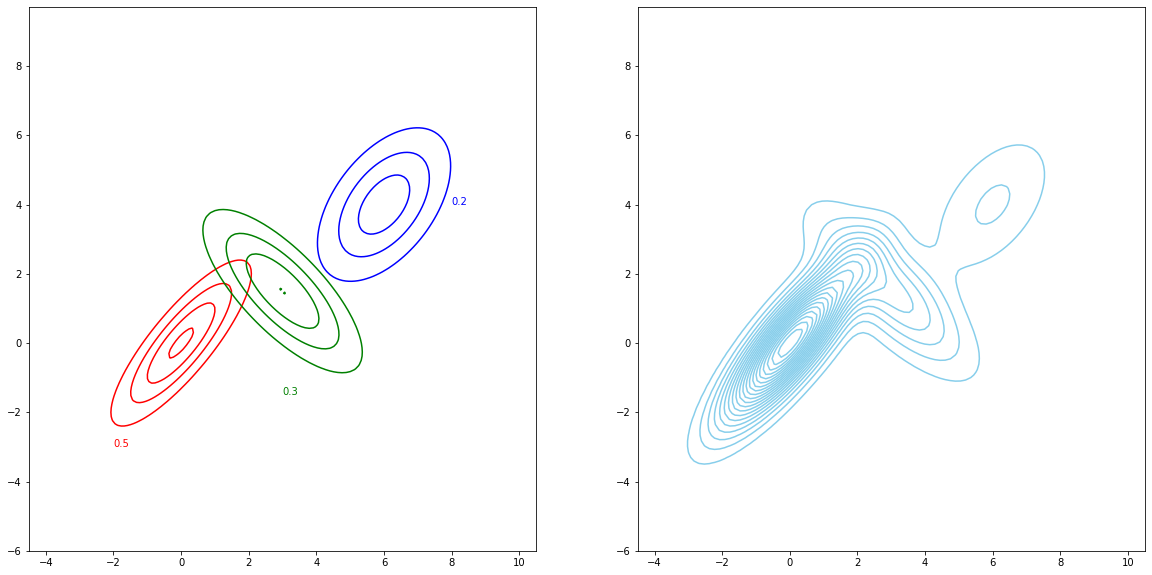

In [ ]:
Means = np.array([[0, 0], [3, 1.5], [6, 4]])
Sigmas = np.array([[[1.5, 1.4], [1.5, 2]], [[2, -1.5], [-1.5, 2]], [[1.5, 0.8], [0.9, 1.9]]])
mix = mix_of_gaussians([Gaussian(Mu, Sigma, 2, lamda) for Mu, Sigma, lamda in zip(Means, Sigmas, [0.5, 0.3, 0.2])])
X1mix, X2mix, Zmix = mix.generateCountour()

#plotting separate contours of 3 guassians and their mixture with probability fractional contributions as [0.5, 0.3, 0.2]
fig, plot = plt.subplots(1, 2, figsize=(20, 10))

# plotting contours
plot[0].contour(X11, X12, Z1, colors='r', levels=4)
plot[0].contour(X21, X22, Z2, colors='g', levels=4)
plot[0].contour(X31, X32, Z3, colors='b', levels=4)
plot[1].contour(X1mix, X2mix, Zmix, colors='skyblue', levels = 20)

# printing fractional contibutions/ probability corresponding to separe contours of guassians
plot[0].text(-2, -3,  str(lamdas[0]), color='r')
plot[0].text(3, -1.5, str(lamdas[1]), color='g')
plot[0].text(8, 4,  str(lamdas[2]), color='b')

plt.show()


### Plotting 3d surgace plot of above obtained gaussian mixture distribution.

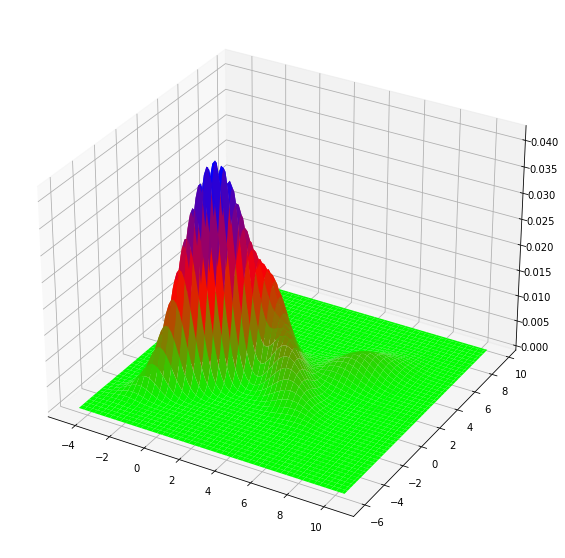

In [ ]:
# 3d surface plotting of distribution of mixture of gaussians using data generated earlier 
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1mix, X2mix, Zmix, cmap='brg_r', edgecolor='none')
plt.show()

## Part 3.b.

##  To generate 500 points from previous mixture of multivariate gaussian distribution

### Defining functions to generate samples corresponding to various gaussian distributions.

In [ ]:
# Utility functions to generate sample of mixture of multivariate guassian distribution

def std_normal_samples():
    # using box muller transform to generate samples of multivariate standard normal distribution
    mean = 0
    variance = 1
    R = sqrt(-2*log(random()))
    a = 2*pi*random()
    return variance*R*cos(a) + mean, variance*R*sin(a) + mean

def cholesky(m):
    # implementing cholesky decomposition for transforming covariance matrix required for generating samples corresponding to mixture of multivariate guassians
    L = np.zeros(m.shape)
    for i in range(m.shape[0]):
        L[i][i] = sqrt(m[i][i] - np.sum(L[i][:i]**2))
        for j in range(i+1, m.shape[0]):
            L[j][i] = (m[j][i] - np.sum(L[j][:i]*L[i][:i]))/L[i][i]
    return L

# create a gaussian variable with given mean and covariance by using the standard normal distribution and cholesky decomposition
def createGaussianSamples (mean, covariance, N = 500):
    X = []
    for _ in range(N):
        X.append(std_normal_samples())
    X = np.array(X)
    # getting L matrix from cholesky decomposition of covariance matrix
    L = cholesky(covariance)
    
    # generating required samples
    samples = np.array([np.dot(L, x) + mean for x in X])
    return samples



### Generating samples corresponding to 3 gaussian distributions and  so using them to create a sample of mixture of gaussian distributions. Also labeling the generated data in mixture corresponding to the responsible cluster. And also assigning probability to data points of belong to different clusters.

In [ ]:
# Define the means of the three Gaussian clusters
means = np.array([[0, 0], [3, 1.5], [6, 4]])

# Define the covariance matrices of the three Gaussian clusters
covariances = np.array([[[1.5, 1.4], [1.5, 2]], [[2, -1.5], [-1.5, 2]], [[1.5, 0.8], [0.9, 1.9]]])

# Define the prior probabilities of the three Gaussian clusters
lamdas = [0.5, 0.3, 0.2]

# Calculate the number of samples to be drawn from each cluster based on the prior probabilities
sampleSizes = np.array(lamdas)*500

# Generate samples from the first Gaussian cluster
samples_0 = createGaussianSamples(means[0], covariances[0], int(sampleSizes[0]))

# Generate samples from the second Gaussian cluster
samples_1 = createGaussianSamples(means[1], covariances[1], int(sampleSizes[1]))

# Generate samples from the third Gaussian cluster
samples_2 = createGaussianSamples(means[2], covariances[2], int(sampleSizes[2]))

# Append a column of zeros to the samples from the first Gaussian cluster to indicate the cluster label
samples_0 = np.concatenate((samples_0, np.zeros(samples_0.shape[0]).reshape(-1, 1)), axis=1)

# Append a column of ones to the samples from the second Gaussian cluster to indicate the cluster label
samples_1 = np.concatenate((samples_1, np.ones(samples_1.shape[0]).reshape(-1, 1)), axis=1)

# Append a column of twos to the samples from the third Gaussian cluster to indicate the cluster label
samples_2 = np.concatenate((samples_2, 2*np.ones(samples_2.shape[0]).reshape(-1, 1)), axis=1)

# Concatenate the samples from all three Gaussian clusters into a single data frame
samples = np.concatenate((samples_0, samples_1, samples_2), axis=0)

# Create a pandas data frame from the samples
df = pd.DataFrame(samples, columns=['x1', 'x2', 'cluster'])

# Shuffle the rows of the data frame
df = df.sample(frac=1).reset_index(drop=True)

# Convert the cluster labels from floats to integers
df['cluster'] = df['cluster'].astype('int')

# Create a Gaussian object for the first Gaussian cluster using the mean and covariance matrix
gaussian_0 = Gaussian(means[0], covariances[0], 2, lamda_fraction=lamdas[0])

# Create a Gaussian object for the second Gaussian cluster using the mean and covariance matrix
gaussian_1 = Gaussian(means[1], covariances[1], 2, lamda_fraction=lamdas[1])

# Create a Gaussian object for the third Gaussian cluster using the mean and covariance matrix
gaussian_2 = Gaussian(means[2], covariances[2], 2, lamda_fraction=lamdas[2])

# Initialize the cluster probability columns to zero
df['cluster_prob0'] = 0
df['cluster_prob1'] = 0
df['cluster_prob2'] = 0
df['sumcluster_prob'] = 0

# Loop over each row in the data frame
for i in range(df.shape[0]):
    # Calculate the probability of the current sample belonging
    df.loc[i, 'cluster_prob0'] = gaussian_0.pmf(np.array([df.loc[i, 'x1'], df.loc[i, 'x2']]))
    df.loc[i, 'cluster_prob1'] = gaussian_1.pmf(np.array([df.loc[i, 'x1'], df.loc[i, 'x2']]))
    df.loc[i, 'cluster_prob2'] = gaussian_2.pmf(np.array([df.loc[i, 'x1'], df.loc[i, 'x2']]))

    df.loc[i, 'sumcluster_prob'] = df.loc[i, 'cluster_prob0'] + df.loc[i, 'cluster_prob1'] + df.loc[i, 'cluster_prob2']
    # normalize the probabilities so that it sums to 1
    df.loc[i, 'cluster_prob0'] = df.loc[i, 'cluster_prob0']/df.loc[i, 'sumcluster_prob']
    df.loc[i, 'cluster_prob1'] = df.loc[i, 'cluster_prob1']/ df.loc[i, 'sumcluster_prob']
    df.loc[i, 'cluster_prob2'] = df.loc[i, 'cluster_prob2']/ df.loc[i, 'sumcluster_prob']

    df.loc[i, 'sumcluster_prob'] = df.loc[i, 'cluster_prob0'] + df.loc[i, 'cluster_prob1'] + df.loc[i, 'cluster_prob2']


### Code for visualizing clustering and probabilities in Python using matplotlib.





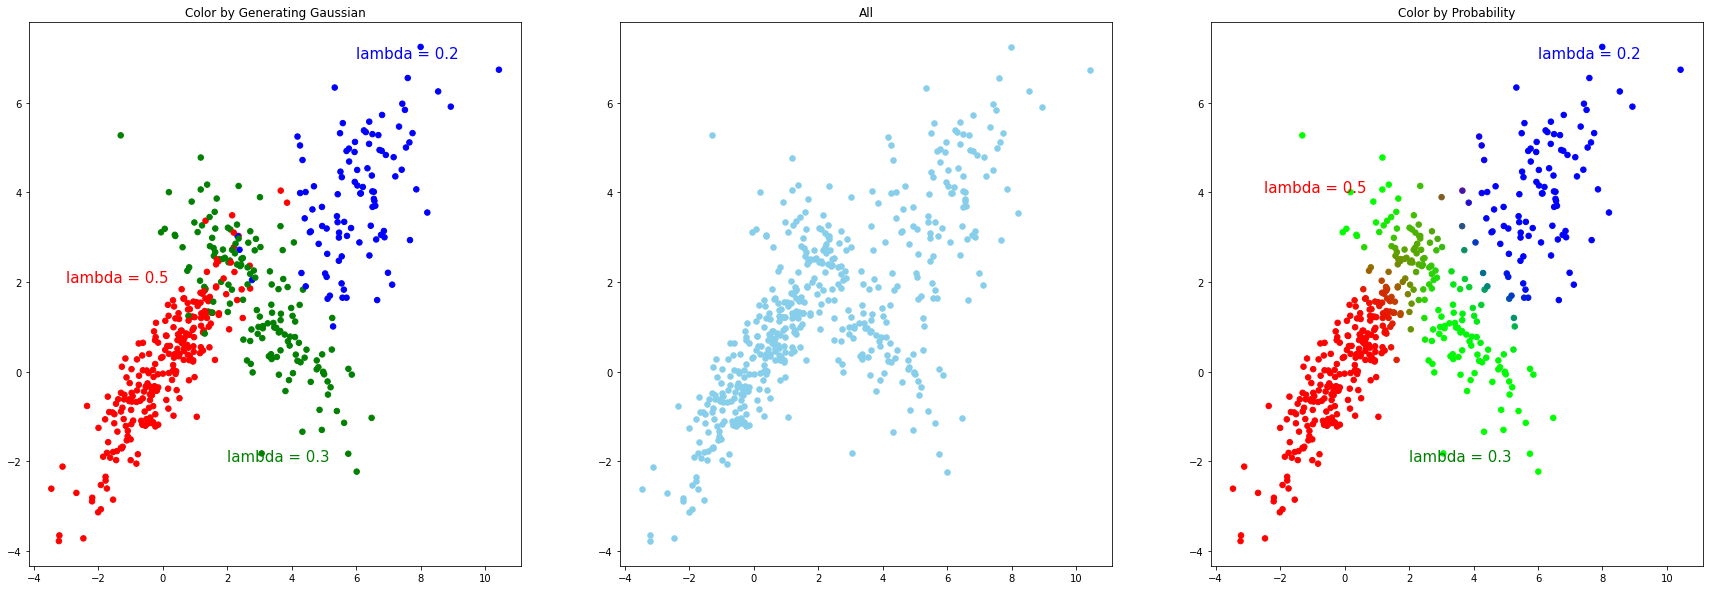

In [ ]:
# plot 3 plots 

'''

Plot I: scatter plot of the data in position one uses colours to indicate clusters.
Plot II: a scatterplot of all the data
Plot III: is a scatter plot with rgb values based on the probability for each data point.

'''

# Create a figure with 3 subplots
fig, plots = plt.subplots(1, 3, figsize=(30, 10))

# Plot 1: Scatter plot of the data with colors as the cluster label
# Use red, green, and blue colors to represent each cluster
rgb = np.array(['red', 'green', 'blue'])
plots[0].scatter(df['x1'], df['x2'] , c=rgb[df['cluster'].values], s=30)
plots[0].set_title('Color by Generating Gaussian')

# Plot 2: Scatter plot of all data
# Use skyblue color to represent all data points
plots[1].scatter(df['x1'], df['x2'],c='skyblue', s=30)
plots[1].set_title('All')

# Calculate the RGB values for each data point based on the probabilities
df['rgb'] = df.apply(lambda row: [row['cluster_prob0'], row['cluster_prob1'], row['cluster_prob2']], axis=1)

# Plot 3: Scatter plot with RGB values for each data point based on the probabilities
plots[2].scatter(df['x1'], df['x2'], c=df['rgb'], s=30)
plots[2].set_title('Color by Probability')

# Add text labels to the first and third plots to indicate the value of lambda for each cluster
plots[0].text(-3, 2, 'lambda = ' + str(lamdas[0]), color='r', fontsize=15)
plots[0].text(2, -2, 'lambda = ' + str(lamdas[1]), color='g', fontsize=15)
plots[0].text(6, 7, 'lambda = ' + str(lamdas[2]), color='b', fontsize=15)

plots[2].text(-2.5, 4, 'lambda = ' + str(lamdas[0]), color='r', fontsize=15)
plots[2].text(2, -2, 'lambda = ' + str(lamdas[1]), color='g', fontsize=15)
plots[2].text(6, 7, 'lambda = ' + str(lamdas[2]), color='b', fontsize=15)

# Turn off grid lines for all plots
for i in range(3):
    plots[i].grid(False)
